In [85]:
import plots as pl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks

data, imported_data_details = pl.import_one_data(r"C:\Users\jelle\OneDrive - Delft University of Technology\TM12005 Advanced Signal Processing\opdracht 2\data","005_Pimpel_3.mat" )

leads = {}
for i in range(12):
    leads[f'lead_{i+1}'] = data["ecg"]["sig"][0][0][:,i]

In [90]:
indices = np.where(leads['lead_1'] < -3000)[0]


# Create a DataFrame with indices and their differences
test = pd.DataFrame({
    'indices': indices,
    'diff': np.diff(indices, prepend=indices[0])
})

test

test

,indices,diff
0,171,0
1,357,186
2,543,186
3,731,188
4,915,184
...,...,...
1241344,8171995,1
1241345,8171996,1
1241346,8171997,1
1241347,8171998,1


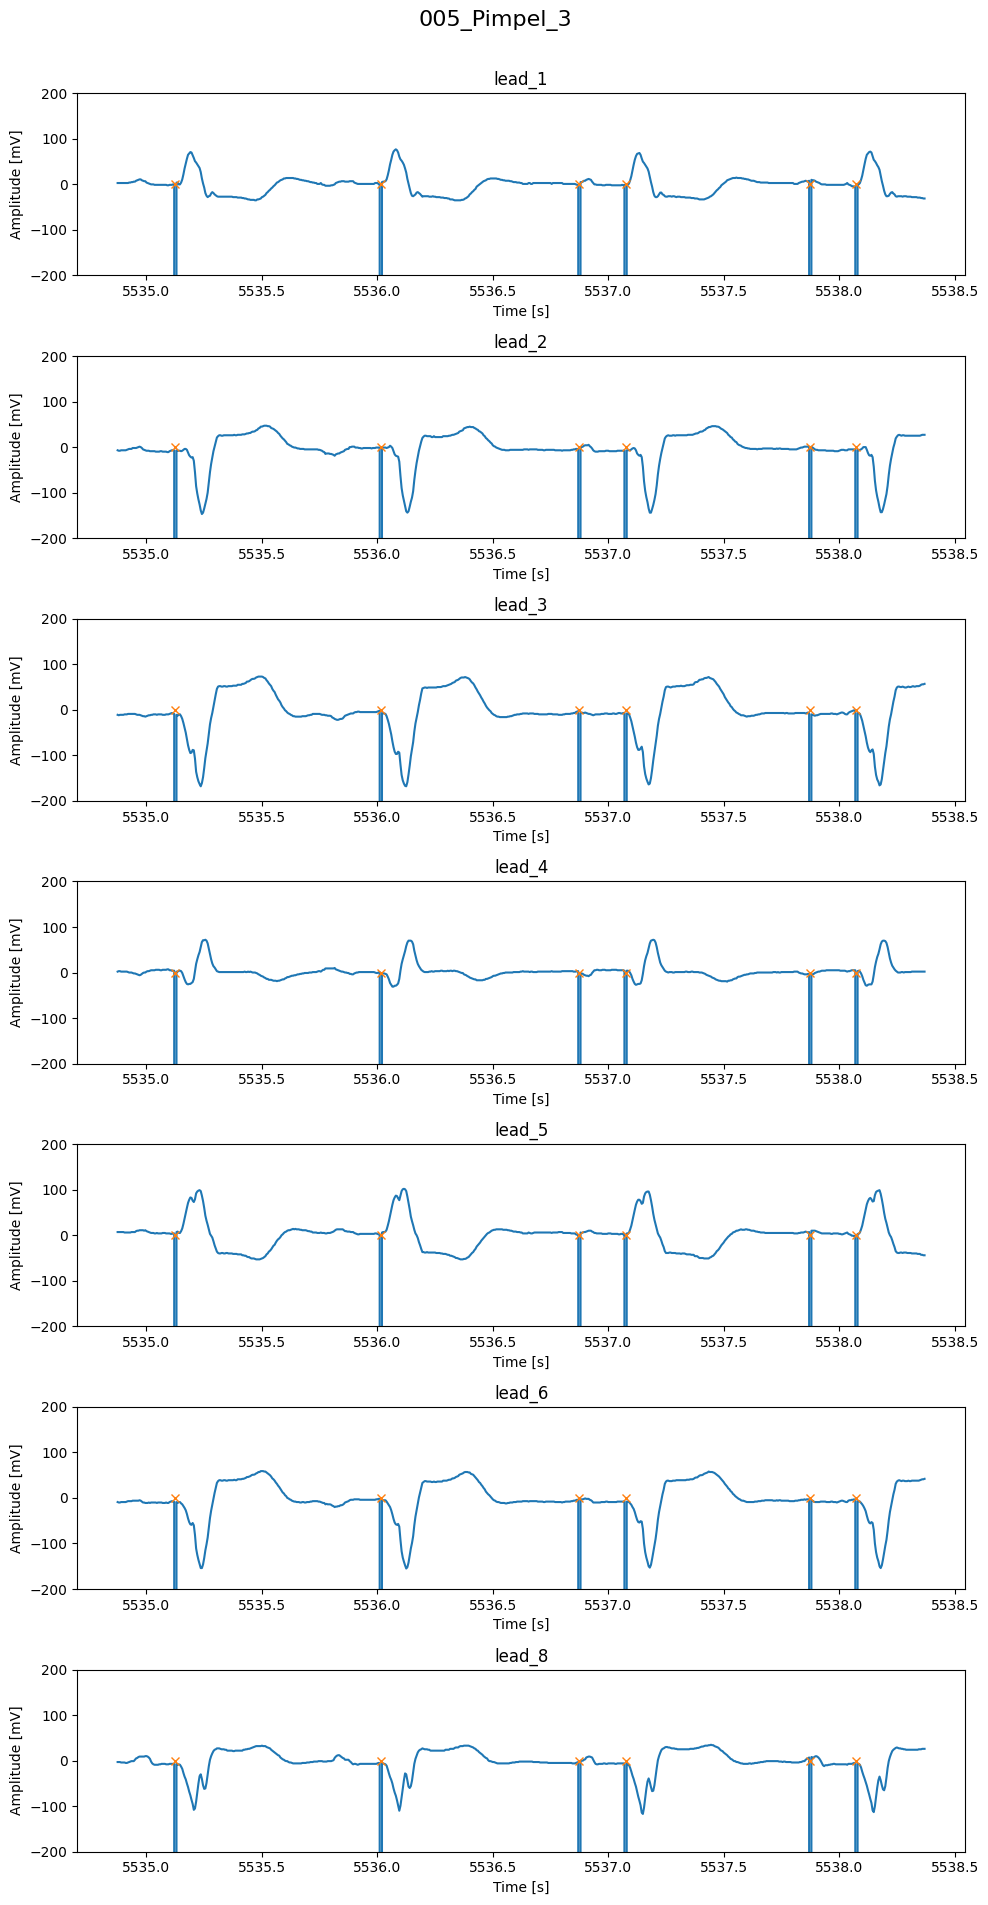

In [91]:
# xlim pimpel = ax[index].set_xlim(1202000, 1204000)
# pimpel_1 = 8802000:8804000. Lijkt op sensing atrium en activating ventrikels (AV-block). Beter: slice(432047-200,432047+500)
# pimpel_2 = 12200 :13000. pacing in atrium, (276727 :277927) of (2618275 :2618875) pacing in ventrikels (geen p-top). Beter: around = 1274817
# pimpel_3 = 6993  :7793. pacing in atrium. 415139  :415639 pacing in atrium en ventrikels


leads_names = ["lead_1", "lead_2", "lead_3", "lead_4", "lead_5", "lead_6", "lead_8"]

fs = 200

around = 1107375

indexes = slice(around-400,around+300)
time_values = np.arange(indexes.start, indexes.stop) / fs
fig, ax = plt.subplots(len(leads_names),1, figsize=(10, 20))


for index, i in enumerate(leads_names):
    data = leads[i][indexes]
    ax[index].plot(time_values, data)
    ax[index].set_title(i)
    ax[index].set_ylim(-200, 200)
    ax[index].set_xlabel("Time [s]")
    ax[index].set_ylabel("Amplitude [mV]")
# Find peaks
    pulses = data < -3000  # Adjust height parameter as needed
    ax[index].plot(time_values[pulses], np.zeros(len(data[pulses])), "x")  # Mark peaks with 'x'

fig.suptitle("005_Pimpel_3", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.975])
#plt.save("pimpel_1.png")


(702000.0, 704000.0)

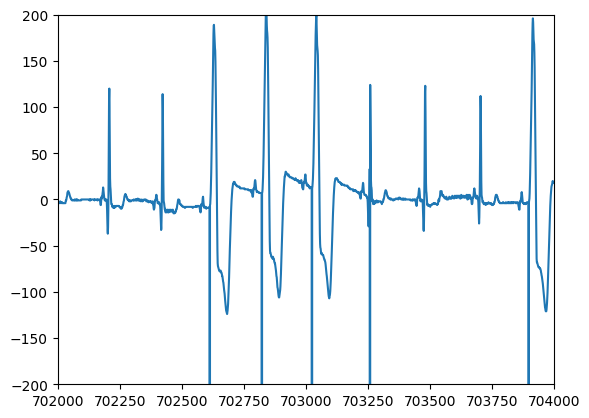

In [60]:

plt.plot(lead_4)
plt.ylim(-200, 200)
plt.xlim(702000, 704000)

(803000.0, 804000.0)

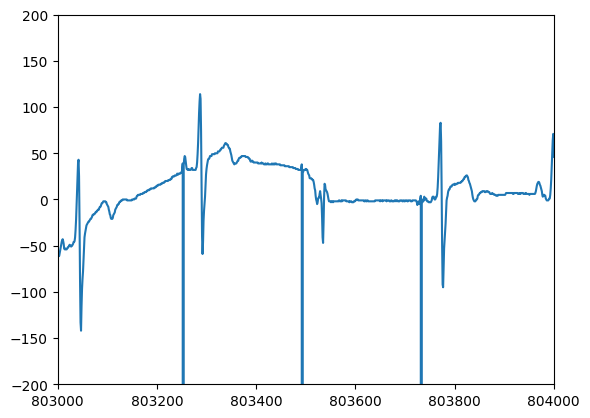

In [69]:
plt.plot(lead_7)
plt.ylim(-200, 200)
plt.xlim(803000, 804000)